# 一、固定字符切分

固定字符大小分块是最基础的分块方法，简单来说，就是不管内容如何，直接按固定的字符数把文本“切”成块。比如，每 300 个字符切一刀，完事儿。

1. 优点：
- 简单省事：这种方法实现起来超级简单，几乎不需要什么计算资源，特别适合快速上手。
- 整齐划一：生成的块大小均匀，方便后续处理，比如存储或检索。
2. 缺点：
- 忽略上下文：它完全不管文本的结构和意思，切出来的块可能会把完整的信息拆得支离破碎。
- 效率不高：重要的内容可能会被“拦腰截断”，想要重新拼出有意义的信息，还得额外费功夫。

In [5]:
# 将示例文本分块
text = "This is the text I would like to ch up. It is the example text for this exercise." 

chunks = []
chunk_size = 35
for i in range(0, len(text), chunk_size):
    chunk = text[i: i + chunk_size]
    chunks.append(chunk)
    
print(chunks)

['This is the text I would like to ch', ' up. It is the example text for thi', 's exercise.']


使用langchain实现

In [30]:
from langchain.text_splitter import CharacterTextSplitter 

text = "This is the text I would like to ch up. It is the example text for this exercise." 

# 使用指定的块大小初始化文本分割器
text_splitter = CharacterTextSplitter(
    separator="",  # 必须指定分隔符
    chunk_size=35,
    chunk_overlap=0,
    strip_whitespace=False,
)

# print(dir(text_splitter))
# 使用文本分割器创建文档
# documents = text_splitter.split_text(text) 
documents = text_splitter.create_documents([text]) 
# 显示创建的文档
for doc in documents:
    print (doc.page_content) 
    

This is the text I would like to ch
 up. It is the example text for thi
s exercise.


# 递归字符文本分割:保持上下文关联

递归字符文本分割是一种更高级的技术，它考虑了文本的结构。它使用一系列分隔符以递归方式将文本分成块，确保块更有意义且与上下文更相关

RecursiveCharacterTextSplitter这个工具会尽量在保持文本逻辑结构的同时进行拆分。不过，这也暴露了一个问题：由于块大小设置得比较小，它还是有可能在单词或句子中间“咔嚓”一刀，这显然不是我们想要的效果。

1. 优点：
- 上下文更连贯：这种方法通过使用段落或句子作为分隔符，能够更好地保留文本的自然结构。
- 灵活性强：你可以根据需要调整块的大小和重叠部分，这样就能更精细地控制整个分块过程。
2. 缺点：
- 块大小是个关键：块的大小得适中，既要方便处理，又要确保每个块至少包含一个完整的短语或更多内容。否则，我们在检索这些块时，可能会遇到精度问题。
- 性能消耗：由于采用了递归拆分和处理多个分隔符的方式，这种方法会消耗更多的计算资源。而且，与固定大小的块相比，它生成的块数量也会更多

In [33]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text = """
The Olympic Games, originally held in ancient Greece, were revived in 1896 and
have since become the world’s foremost sports competition, bringing together 
athletes from around the globe.
"""
# Initialize the recursive character text splitter with specified chunk size
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size=30,
    chunk_overlap=0,
    length_function=len,
    is_separator_regex=False,
)

documents = text_splitter.create_documents([text])
for doc in documents:
    print(doc.page_content)

The Olympic Games, originally
held in ancient Greece, were
revived in 1896 and
have since become the world’s
foremost sports competition,
bringing together
athletes from around the
globe.


在这种方法中，文本首先会按照较大的结构（比如段落）进行拆分。如果拆分后的块还是太大，就会继续用更小的结构（比如句子）进一步切分。这样一来，每个块都能保留有意义的上下文，避免了重要信息被“拦腰截断”的情况。

递归字符文本分割法在简单和复杂之间找到了一个平衡点，既不会过于粗暴地切割文本，也不会让分块过程变得繁琐。它提供了一种既高效又尊重文本结构的分块方式，算得上是一种非常实用的工具。

# 三、特定文档的拆分：因地制宜
这种方法会根据不同的文档类型，量身定制分块策略。比如，Markdown 文件、Python 脚本、JSON 文档或者 HTML 文件，每种文档都会按照最适合其内容和结构的方式进行拆分。
举个例子，Markdown 文件在 GitHub、Medium 和 Confluence 等平台上非常常见，这也让它成为 RAG 系统中提取数据的首选。毕竟，干净且结构化的数据对于生成准确的响应至关重要。

不仅如此，针对特定编程语言的分割器也适用于多种语言，比如 C++、Go、Java、Python 等。这样一来，代码可以被高效地分块，方便后续的分析和检索。

简单来说，这种方法就是“看菜下饭”，根据文档的特点灵活处理，确保分块既高效又精准

1. 优点：
- 相关性更强：针对不同类型的文档，采用最合适的分块方法，同时还能保留文档的逻辑结构。
- 精确度更高：根据每种文档的特点量身定制分块过程，确保分块结果更精准。
2. 缺点：
- 实现起来有点复杂：因为不同类型的文档需要不同的分块策略和工具，所以实现起来会麻烦一些。
- 维护成本较高：由于方法多样，维护起来也会相对复杂，需要投入更多精力。

这种方法虽然效果更好，但也需要更多的“技术含量”和“耐心”来支撑！

## 3.1 Markdown 切块

In [36]:
from langchain.text_splitter import MarkdownTextSplitter

markdown_text = """
# Fun in California
## Driving
Try driving on the 1 down to San Diego
### Food
Make sure to eat a burrito while you're there
## Hiking
Go to Yosemite
"""

text_splitter = MarkdownTextSplitter(chunk_size=40, chunk_overlap=0)

documents = text_splitter.create_documents([markdown_text])
for i, doc in enumerate(documents):
    print(f'{i}: {doc.page_content}')

0: # Fun in California
## Driving
1: Try driving on the 1 down to San Diego
2: ### Food
3: Make sure to eat a burrito while you're
4: there
5: ## Hiking
Go to Yosemite


# 四、语义分割：保留语义的完整性

以前的文档拆分方式，说白了就是“简单粗暴”——要么按固定长度切分，要么死板地按照标点符号来划分。但我们现在用的这种语义拆分，那可真是“聪明”多了！它就像个理解能力超强的读者，会根据文本的实际意思来决定怎么拆分，把文档处理带到了一个新高度。

具体是怎么做到的呢？这要归功于先进的嵌入技术。系统会先理解文本的含义，然后把意思相近的内容自动归类到一起。这样一来，每个拆分出来的文本块都是一个完整的“小故事”，前后文都对得上，不会出现前言不搭后语的情况。

你可以把它想象成一个特别会整理资料的小助手：它不会把你的文件随便撕成几半，而是会仔细阅读内容，把相关的部分整整齐齐地放在一起。这样不仅看起来舒服，用起来也特别顺手！
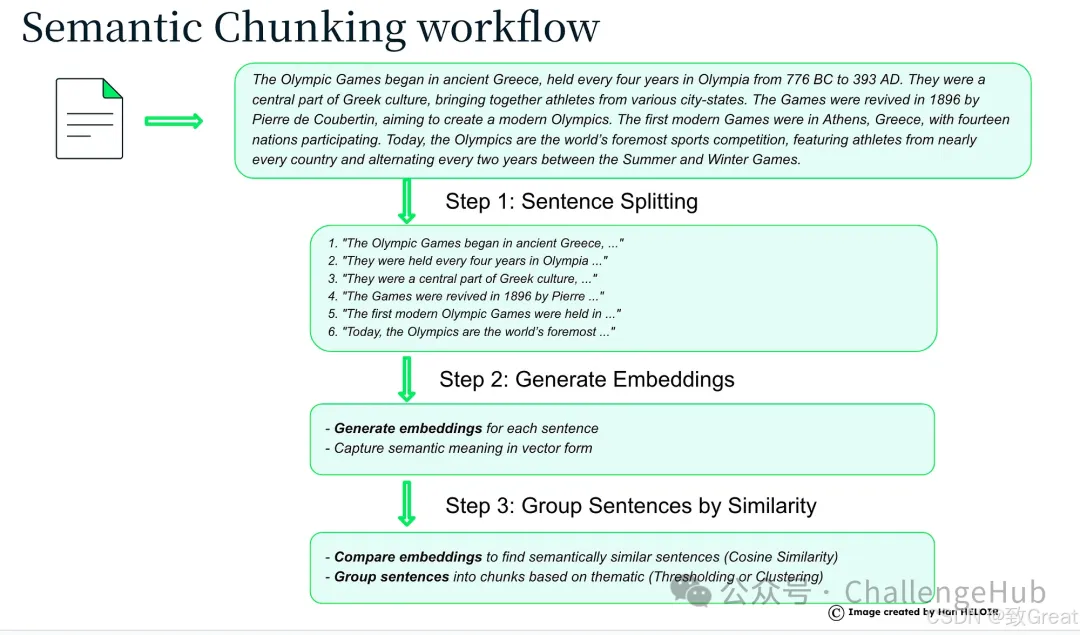

让我们来看看这个语义分块是怎么工作的，就像拆解一个精密的机器一样，它主要分三步走：

第一步，先把文档“切”成一句一句的。这可不是简单的断句哦，系统会像语文老师一样，准确地识别出每个完整的句子。

第二步，给每个句子穿上“智能外套”——也就是生成嵌入向量。这个过程就像是给句子打上独特的身份标签，让系统能理解它们的含义。

第三步最有趣，系统会像个细心的图书管理员，把意思相近的句子归类到一起。想象一下，它会把讨论同一个话题的句子自动归为一组，就像把同类型的书籍放在同一个书架上。

这样做的好处显而易见：每个分块都是一个完整的小故事，前后文都对得上号。当你需要查找信息时，系统就能快速找到最相关的内容，准确率杠杠的！

1.优点
- 上下文拿捏得准：相似的内容总在一起，找信息时特别给力，准确率up up！
- 灵活度满分：不管什么类型的文本，它都能根据意思来调整，不会死板地按固定规则来。
2. 缺点
- 有点费算力：毕竟要生成和比较那些嵌入向量，需要多花点计算资源。
- 实现起来不简单：比起直接按字数或标点拆分，这个方法确实复杂一些。

In [81]:
# 代码实现
from sklearn.metrics.pairwise import cosine_similarity
from langchain.embeddings import HuggingFaceEmbeddings
import re

# Sample text
text = """
One of the most important things I didn't understand about the world when I was a child is the degree to which the returns for performance are superlinear.
Teachers and coaches implicitly told us the returns were linear. "You get out," I heard a thousand times, "what you put in." They meant well, but this is rarely true. If your product is only half as good as your competitor's, you don't get half as many customers. You get no customers, and you go out of business.
It's obviously true that the returns for performance are superlinear in business. Some think this is a flaw of capitalism, and that if we changed the rules it would stop being true. But superlinear returns for performance are a feature of the world, not an artifact of rules we've invented. We see the same pattern in fame, power, military victories, knowledge, and even benefit to humanity. In all of these, the rich get richer.
"""

# Splitting the text into sentences
sentences = re.split(r'(?<=[.?!])\s+', text)
sentences = [{'sentence': x, 'index' : i} for i, x in enumerate(sentences)]

# Combine sentences for context
def combine_sentences(sentences, buffer_size=1):
    for i in range(len(sentences)):
        combined_sentence = ''
        for j in range(i - buffer_size, i):
            if j >= 0:
                combined_sentence += sentences[j]['sentence'] + ' '
        combined_sentence += sentences[i]['sentence']
        for j in range(i + 1, i + 1 + buffer_size):
            if j < len(sentences):
                combined_sentence += ' ' + sentences[j]['sentence']
        sentences[i]['combined_sentence'] = combined_sentence
    return sentences

sentences = combine_sentences(sentences)

# Generate emeddings
emb_path = "../../../../models/M3E/xrunda/m3e-base/"
oai_embeds = HuggingFaceEmbeddings(model_name=emb_path)
embeddings = oai_embeds.embed_documents([x['combined_sentence'] for x in sentences])

# Add embeddings to sentences
for i, sentence in enumerate(sentences):
    sentence['combined_sentence_embedding'] = embeddings[i]
# Calculate cosine distances
def calculate_cosine_distances(sentences):
    distances = []
    for i in range(len(sentences) - 1):
        embedding_current = sentences[i]['combined_sentence_embedding']
        embedding_next = sentences[i + 1]['combined_sentence_embedding']
        similarity = cosine_similarity([embedding_current], [embedding_next])[0][0]
        distance = 1 - similarity
        distances.append(distance)
        sentences[i]['distance_to_next'] = distance
    return distances, sentences
distances, sentences = calculate_cosine_distances(sentences)
# Determine breakpoints and create chunks
import numpy as np
breakpoint_distance_threshold = np.percentile(distances, 95)
indices_above_thresh = [i for i, x in enumerate(distances) if x > breakpoint_distance_threshold]
# Combine sentences into chunks
chunks = []
start_index = 0
for index in indices_above_thresh:
    end_index = index
    group = sentences[start_index:end_index + 1]
    combined_text = ' '.join([d['sentence'] for d in group])
    chunks.append(combined_text)
    start_index = index + 1
if start_index < len(sentences):
    combined_text = ' '.join([d['sentence'] for d in sentences[start_index:]])
    chunks.append(combined_text)
# Display the created chunks
for i, chunk in enumerate(chunks):
    print(f"Chunk #{i+1}:\n{chunk}\n")

Chunk #1:

One of the most important things I didn't understand about the world when I was a child is the degree to which the returns for performance are superlinear. Teachers and coaches implicitly told us the returns were linear. "You get out," I heard a thousand times, "what you put in." They meant well, but this is rarely true. If your product is only half as good as your competitor's, you don't get half as many customers. You get no customers, and you go out of business. It's obviously true that the returns for performance are superlinear in business. Some think this is a flaw of capitalism, and that if we changed the rules it would stop being true. But superlinear returns for performance are a feature of the world, not an artifact of rules we've invented. We see the same pattern in fame, power, military victories, knowledge, and even benefit to humanity. In all of these, the rich get richer.

Chunk #2:




 ## 4.2 语义文档分割器（SemanticChunker）
sentences用langchain的内置分割器实现

In [82]:
from langchain_experimental.text_splitter import SemanticChunker
from langchain.embeddings import HuggingFaceEmbeddings


emb_path = "../../../../models/M3E/xrunda/m3e-base/"
text_splitter = SemanticChunker(
    embeddings=HuggingFaceEmbeddings(model_name=emb_path),
    breakpoint_threshold_type="standard_deviation"
)

text = """
One of the most important things I didn't understand about the world when I was a child is the degree to which the returns for performance are superlinear.
Teachers and coaches implicitly told us the returns were linear. "You get out," I heard a thousand times, "what you put in." They meant well, but this is rarely true. If your product is only half as good as your competitor's, you don't get half as many customers. You get no customers, and you go out of business.
It's obviously true that the returns for performance are superlinear in business. Some think this is a flaw of capitalism, and that if we changed the rules it would stop being true. But superlinear returns for performance are a feature of the world, not an artifact of rules we've invented. We see the same pattern in fame, power, military victories, knowledge, and even benefit to humanity. In all of these, the rich get richer.
"""
docs = text_splitter.split_text(text)
print(len(text))
print(len(docs))


901
1


In [83]:
for i,doc in enumerate(docs):
    print(f'{i} --> {doc}')

0 --> 
One of the most important things I didn't understand about the world when I was a child is the degree to which the returns for performance are superlinear. Teachers and coaches implicitly told us the returns were linear. "You get out," I heard a thousand times, "what you put in." They meant well, but this is rarely true. If your product is only half as good as your competitor's, you don't get half as many customers. You get no customers, and you go out of business. It's obviously true that the returns for performance are superlinear in business. Some think this is a flaw of capitalism, and that if we changed the rules it would stop being true. But superlinear returns for performance are a feature of the world, not an artifact of rules we've invented. We see the same pattern in fame, power, military victories, knowledge, and even benefit to humanity. In all of these, the rich get richer. 


# 五、代理分割：自主智能切片
代理分割（Agentic Splitter）这招可厉害了！它靠着大语言模型的超强理解力，能像人一样聪明地给文本分块。
这个方法高级在哪呢？它会像我们读书时那样，先理解内容的意思，再看看上下文，然后找出最合适的地方“下刀”。完全不像以前那些死板的规则或者纯靠统计的方法。

说白了，它处理文本的方式就跟人一样灵活。想象一下你读文章时会怎么分段——肯定是根据意思和思路来的对吧？这个分裂器也是这么干的！所以分出来的块特别连贯，内容也都很相关，用起来特别顺手。
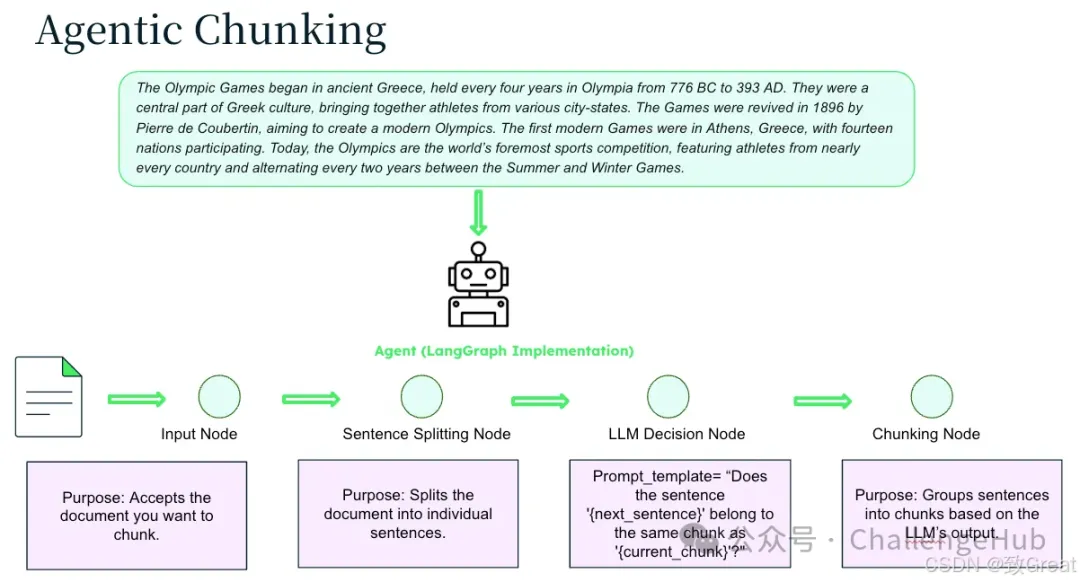

1.优点：
- 准得很：靠着强大的语言模型，分出来的块不仅内容相关，上下文也特别准。
- 够灵活：不管什么类型的文本都能搞定，分块策略还能随时调整，特别聪明。
2.缺点：
- 有点烧资源：毕竟要用大语言模型，计算资源少不了，成本也会高一些。
- 实现起来不简单：得好好设置和微调语言模型，才能让它发挥最佳水平。

In [84]:
from langgraph.nodes import InputNode, SentenceSplitterNode, LLMDecisionNode, ChunkingNode

# Step 1: Input Node
input_node = InputNode(name="Document Input")

# Step 2: Sentence Splitting Node
splitter_node = SentenceSplitterNode(input=input_node.output, name="Sentence Splitter")

# Step 3: LLM Decision Node
decision_node = LLMDecisionNode(
    input=splitter_node.output, 
    prompt_template="Does the sentence '{next_sentence}' belong to the same chunk as '{current_chunk}'?", 
    name="LLM Decision"
)

# Step 4: Chunking Node
chunking_node = ChunkingNode(input=decision_node.output, name="Semantic Chunking")

# Run the graph
document = "Your document text here..."
result = chunking_node.run(document=document)
print(result)

ModuleNotFoundError: No module named 'langgraph.nodes'